In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
X_train = []
y_train = []
image_size = 150

folderPath ='/kaggle/input/augmented-cow-dataset/hcaugmented-20230312T040548Z-001/hcaugmented'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)
folderPath ='/kaggle/input/augmented-cow-dataset/lcaugmented-20230312T040559Z-001/lcaugmented'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(2513, 150, 150, 3)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=121)

In [9]:
y_train.shape

(2261,)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 69, 69, 64)        0

In [12]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [14]:
history=model.fit(X_train,y_train,epochs=27,validation_split=.1,callbacks=[best_model])

Epoch 1/27
64/64 [==============================] - 12s 56ms/step - loss: 2.6170 - accuracy: 0.5265 - val_loss: 0.8689 - val_accuracy: 0.5947
Epoch 2/27
64/64 [==============================] - 3s 40ms/step - loss: 0.6973 - accuracy: 0.5585 - val_loss: 0.7456 - val_accuracy: 0.5947
Epoch 3/27
64/64 [==============================] - 3s 41ms/step - loss: 0.6768 - accuracy: 0.5841 - val_loss: 0.6306 - val_accuracy: 0.5947
Epoch 4/27
64/64 [==============================] - 3s 42ms/step - loss: 0.6247 - accuracy: 0.6475 - val_loss: 0.5436 - val_accuracy: 0.7753
Epoch 5/27
64/64 [==============================] - 3s 41ms/step - loss: 0.5939 - accuracy: 0.6853 - val_loss: 0.5340 - val_accuracy: 0.7621
Epoch 6/27
64/64 [==============================] - 3s 41ms/step - loss: 0.5898 - accuracy: 0.7099 - val_loss: 0.5523 - val_accuracy: 0.7533
Epoch 7/27
64/64 [==============================] - 3s 41ms/step - loss: 0.5688 - accuracy: 0.7232 - val_loss: 0.5113 - val_accuracy: 0.7841
Epoch 8/27
6

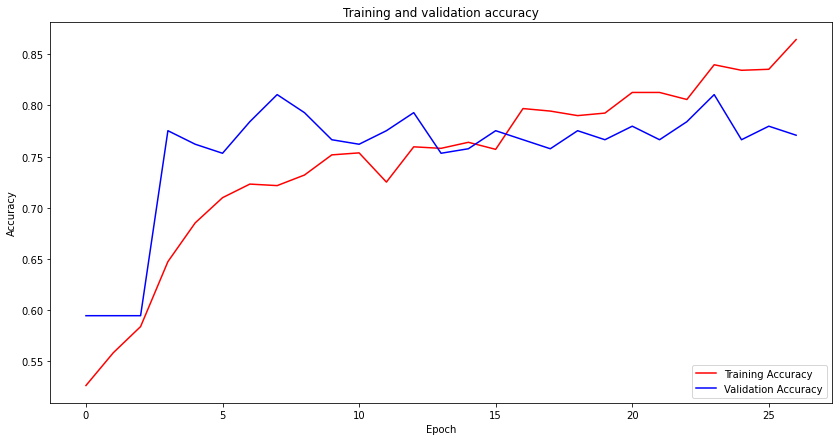

In [15]:
model.save('LumpyDisease.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

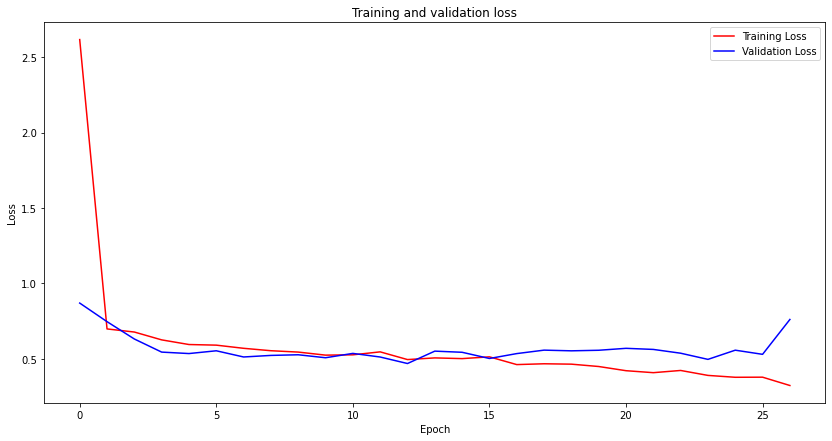

In [16]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [17]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

In [18]:
y_test.shape
pred.shape

(252,)

In [19]:
accuracy = np.sum(pred==y_test)/np.size(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 72.22%


In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from keras.models import load_model
model = load_model('LumpyDisease.h5')
     
import cv2
import numpy as np
img = cv2.imread('positive.jpg') #load image path

if img.size == 0:
    print('Image not found')
    exit(0)

img = cv2.resize(img,(150, 150))
img_array = np.array(img)

img_array.shape
img_array=img_array.reshape(1,150,150,3)

a=model.predict(img_array)
indices = a.argmax()
     
if indices==0:
    print('Probably a Healthy cow')
else:
    print('Probably an Infected cow')
     

1/1 [==============================] - 1s 632ms/step
Probably an Infected cow
